### **Wrangle a Dataset Project**

## **Introduction**

This project involves wrangling (and analyzing and visualizing) the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage.

## **Gathering Data**

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json


In [2]:
#Reading the twitter-archive data
twitter_archive_data = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive_data

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [3]:
#Importing the twitter_json.txt and reading it line by line
tweet_json_list = []
tweet_list = [] 
with open('tweet-json.txt', 'r') as myfile:
  for line in myfile:
    json_line = json.loads(line)
    tweet_json_list.append(json_line)

#Extracting tweetID, retweetCount and favouriteCount
for i in tweet_json_list:
  tweet_id = i['id']
  retweet_count = i['retweet_count']
  favorite_count = i['favorite_count']
  #Appending the columns extracted to a list
    
  tweet_list.append({'id':tweet_id, 'retweet_count':retweet_count, 'favorite_count':favorite_count})

#Creating a data frame from the data extracted from the json file
tweets = pd.DataFrame(tweet_list, columns = ['id', 'retweet_count', 'favorite_count'])
tweets



,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


In [4]:
#Reading the images dataset
dog_images = pd.read_csv('image-predictions.tsv', sep='\t')
dog_images

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


## **Assessing Data**

In [5]:
twitter_archive_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [6]:
twitter_archive_data.duplicated().sum()

0

In [7]:
twitter_archive_data['tweet_id'] = twitter_archive_data['tweet_id'].astype('str')

In [8]:
twitter_archive_data.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

From the assesment above, there are several issues that arise:
1. There are 78 replies in the in both the in_reply_to_status_id and in_reply_to_user_id columns. 
2. timestamp and retweeted_status_timestamp columns should be datetime format and not objects
3. The retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp contain only 181 retweets
4. There are 4 column names for dogs namely: doggo, floofer, pupper and puppo
5. The expanded_urls  seems to be having some missing values
6. Null values have been recorded as None and Nan.
7. According to the Dogtionary, Floofer should be floof


In [9]:
dog_images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


The dataset contains data some of which are not dogs and dog breads and should be removed during cleaning. 

In [10]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [11]:
tweets.describe()

,id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [12]:
#Checking for duplicates
tweets.duplicated().count()

2354

## **Cleaning Data**

In [13]:
#Creating copies of the original data
twitter_archive_clean = twitter_archive_data.copy()
dog_images_clean = dog_images.copy()
tweets_clean = tweets.copy()

In [14]:
#Converting timestamp to a datetime format
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'])

In [15]:
#Let's start by dropping unnecessary columns in twitter_archive_clean
twitter_archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'source', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls'], axis=1, inplace=True)
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2356 non-null   object             
 1   timestamp           2356 non-null   datetime64[ns, UTC]
 2   text                2356 non-null   object             
 3   rating_numerator    2356 non-null   int64              
 4   rating_denominator  2356 non-null   int64              
 5   name                2356 non-null   object             
 6   doggo               2356 non-null   object             
 7   floofer             2356 non-null   object             
 8   pupper              2356 non-null   object             
 9   puppo               2356 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2), object(7)
memory usage: 184.2+ KB


In [16]:
#Assesing the name column
twitter_archive_clean.name.describe()

count     2356
unique     957
top       None
freq       745
Name: name, dtype: object

In [19]:
#The tweets_clean identifier column is called id let's rename it tweet_id for easy merging of the datasets later
tweets_clean.rename(columns={"id":"tweet_id"}, inplace=True)
tweets_clean

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


In [20]:
#Dropping columns that have missing values
twitter_archive_clean.dropna(axis='columns', how='any', inplace=True)

In [21]:
#Renaming the floofer column as floof
twitter_archive_clean.rename(columns={'floofer':'floof'}, inplace=True)

In [22]:
dog_images_clean.p3.head(5)

0      Shetland_sheepdog
1    Rhodesian_ridgeback
2             bloodhound
3     miniature_pinscher
4               Doberman
Name: p3, dtype: object

In [23]:
#converting the tweet_id columns to strings
dog_images_clean['tweet_id'] = dog_images_clean['tweet_id'].astype('str')
tweets_clean['tweet_id'] = tweets_clean['tweet_id'].astype('str')

In [24]:
#Let's merge the three data sources into one using the common field tweet_id
weratedogs_merged = pd.merge(twitter_archive_clean, tweets_clean, on="tweet_id", how = 'outer') 

In [25]:
weratedogs_merged = pd.merge(weratedogs_merged, dog_images_clean, on='tweet_id', how ='outer')
weratedogs_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2356 non-null   object             
 1   timestamp           2356 non-null   datetime64[ns, UTC]
 2   text                2356 non-null   object             
 3   rating_numerator    2356 non-null   int64              
 4   rating_denominator  2356 non-null   int64              
 5   name                2356 non-null   object             
 6   doggo               2356 non-null   object             
 7   floof               2356 non-null   object             
 8   pupper              2356 non-null   object             
 9   puppo               2356 non-null   object             
 10  retweet_count       2354 non-null   float64            
 11  favorite_count      2354 non-null   float64            
 12  jpg_url             2075 non-null 

## **Storing Data**

This step involves saving the merged dataset to a csv file

In [26]:
weratedogs_merged.to_csv(path_or_buf='we_rate_dogs.csv', index=False)

## **Analyzing, and Visualizing Data**

1. What is the trend of retweet count and favorite count over time?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
No handles with labels found to put in legend.


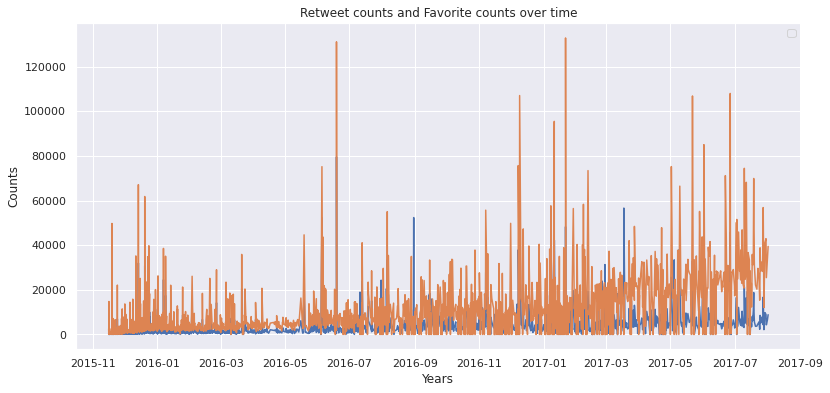

In [27]:
# I am interested in knowing the trends in retweet_count and favorite_count over time
sns.set(rc={'figure.figsize':(13,6)}) 
fig,ax = plt.subplots()
sns.lineplot(weratedogs_merged['timestamp'], weratedogs_merged['retweet_count'])
sns.lineplot(weratedogs_merged['timestamp'], weratedogs_merged['favorite_count'])
ax.legend()
ax.set_title('Retweet counts and Favorite counts over time')
ax.set_ylabel('Counts')
ax.set_xlabel('Years');

2. What is the correlation between rating_numerator,rating_numerator, retweet_count, favorite_count,p1_conf,p2_conf and p3_conf 


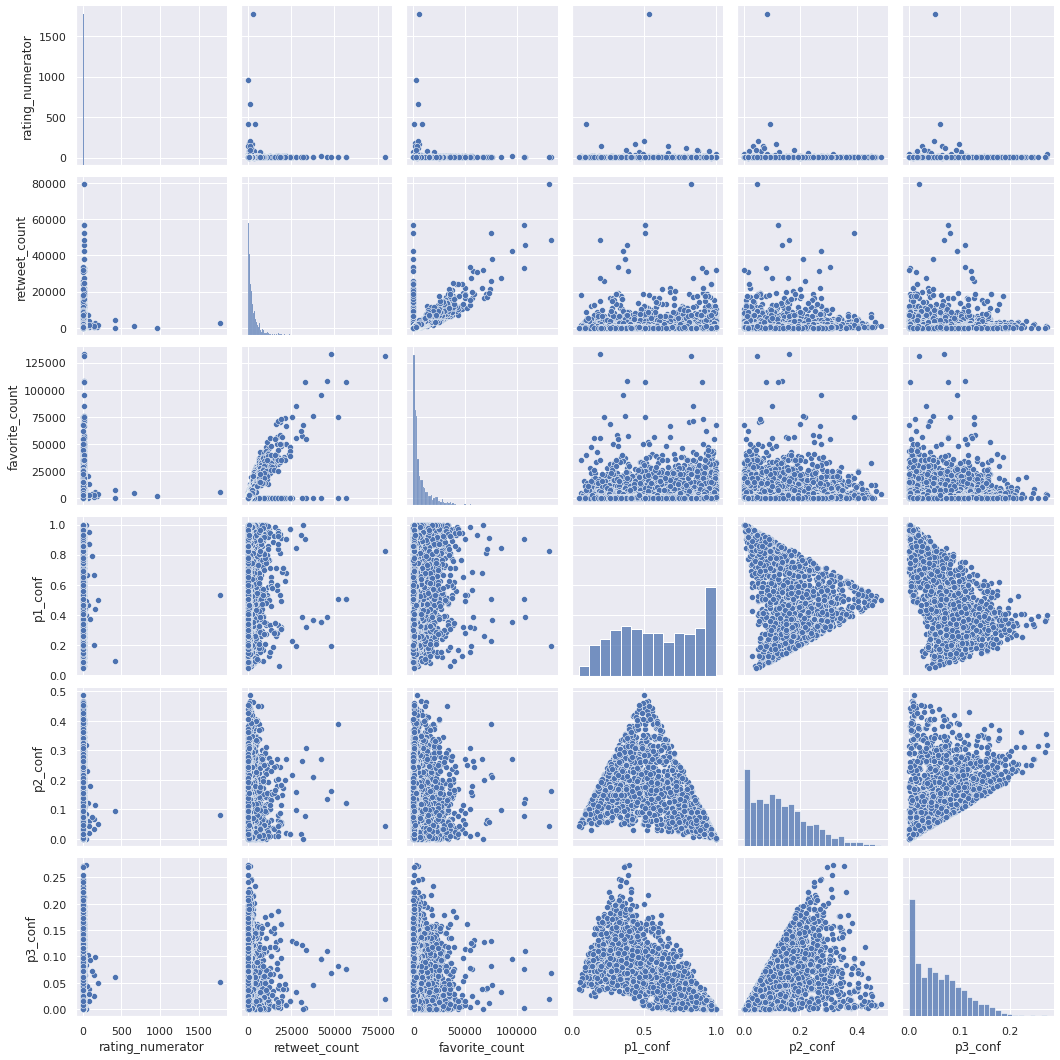

In [28]:
#Let's create a correlation between the rating_numerator, retweet_count, favorite_count,p1_conf,p2_conf and p3_conf 

sns.pairplot(weratedogs_merged, vars=['rating_numerator', 'retweet_count','favorite_count', 'p1_conf', 'p2_conf','p3_conf'])

3. What are the most common dogs

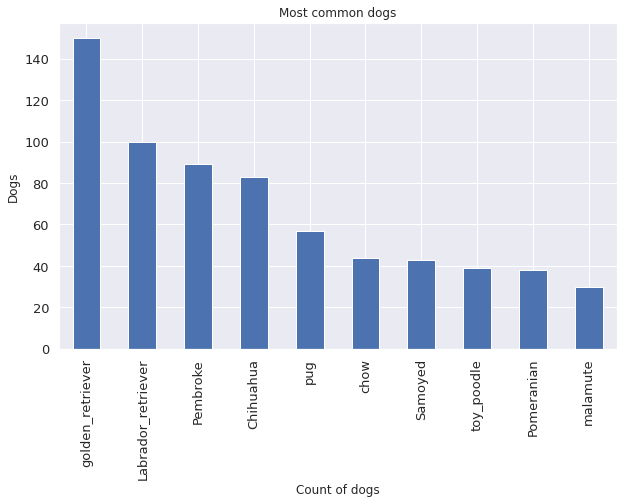

In [41]:
#Let's get a count of the dog breed
counts = weratedogs_merged['p1'].value_counts()[0:10].sort_values(ascending=False)
counts.plot(kind='bar', figsize=(10,6), fontsize=13)
plt.xlabel('Count of dogs')
plt.ylabel('Dogs')
plt.title('Most common dogs');
